# Energy Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read Data and Correct errors

In [2]:
df = pd.read_csv("../datsets/dataset1/archive/HomeC.csv", delimiter = ',')
 

#Dropped last line (null)
df = df.iloc[:-1] #drop last row


#Time is wrong, data was recorded minutely
time_index = pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
df = df.set_index(time_index)
df = df.drop(['time'], axis=1)

#Retirar [kW]
df.columns = [col.replace(' [kW]', '') for col in df.columns]


#Somar colunas 
df['Furnace'] = df[['Furnace 1','Furnace 2']].sum(axis=1)
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)
df = df.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
df = df.drop(['Furnace 1','Furnace 2'], axis=1)

#this column is the same as use
df = df.drop(columns=['House overall'])

#useless
df = df.drop(columns=['summary'])
df = df.drop(columns=['icon'])

#SAVE
#df.to_csv('../datsets/dataset1/archive/HomeC.csv', index=False)


df



,use,gen,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
2016-01-01 05:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.082617,0.000567
2016-01-01 05:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.084533,0.000567
2016-01-01 05:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.083017,0.000617
2016-01-01 05:03:00,1.022050,0.003483,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.175417,0.000650
2016-01-01 05:04:00,1.139400,0.003467,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.300917,0.000783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-16 03:25:00,1.601233,0.003183,0.000050,0.041783,0.005267,0.008667,0.013483,0.032283,0.000983,0.003800,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.727683,0.000633
2016-12-16 03:26:00,1.599333,0.003233,0.000050,0.041750,0.005233,0.008433,0.013433,0.032200,0.000950,0.003800,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.729050,0.000600
2016-12-16 03:27:00,1.924267,0.003217,0.000033,0.042033,0.004983,0.008467,0.012933,0.032283,0.001000,0.003750,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.060117,0.000600
2016-12-16 03:28:00,1.978200,0.003217,0.000050,0.042100,0.005333,0.008233,0.012817,0.032183,0.000950,0.003767,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.116033,0.000650


In [3]:
#CORRECT cloudCover COLUMN

print(df['cloudCover'].unique())

#replace missing values with the next valid observation 
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True) 

#change to floar
df['cloudCover'] = df['cloudCover'].astype('float')

df['cloudCover'].unique()

['cloudCover' '0.75' '0' '1' '0.31' '0.44' '0.13' '0.19' '0.25' '0.16'
 '0.21' '0.15' '0.14' '0.27' '0.28' '0.17' '0.05' '0.1' '0.26' '0.29'
 '0.11' '0.09' '0.12' '0.06' '0.02' '0.08' '0.04' '0.35' '0.22' '0.23'
 '0.54' '0.39' '0.03' '0.07' '0.76' '0.62' '0.18' '0.79' '0.48' '0.24'
 '0.57' 0.24 1.0 0.31 0.28 0.15 0.41 0.1 0.12 0.08 0.09 0.19 0.04 0.05
 0.29 0.27 0.35 0.18 0.06 0.03 0.11 0.14 0.25 0.78 0.0 0.16 0.21 0.23 0.17
 0.75 0.26 0.2 0.76 0.13 0.77 0.46 0.07 0.55 0.02 0.01 0.51 0.47 0.5 0.4
 0.3 0.22 0.43 0.33 0.6 0.68 0.66 0.45 0.34 0.52 0.67 0.48 0.49 0.39 0.37
 0.62 0.36 0.79 0.61 0.38 0.42 0.53 0.63 0.44 0.54 0.32 0.56 0.58 0.72
 0.57 0.73 0.71 0.64 0.59]


array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

In [4]:
#GROUP DATA PER HOUR INTERVAL

#data  is in KwH, basta fazer a media
df = df.resample('H').mean()

#DROP LAST LINE (INCOMPLETE HOUR)
df.drop(df.tail(1).index,inplace=True)


df['month'] = df.index.month
df['weekday'] = df.index.day
df['hour'] = df.index.hour


df

,use,gen,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,month,weekday,hour
2016-01-01 05:00:00,1.044130,0.003307,0.000064,0.241814,0.037861,0.063351,0.013046,0.038881,0.001042,0.021652,...,0.750000,282.100000,0.000000,24.383333,0.000,0.393188,0.000821,1,1,5
2016-01-01 06:00:00,0.918167,0.003422,0.000099,0.043294,0.075522,0.112942,0.012836,0.039181,0.001021,0.004216,...,0.750000,284.733333,0.000000,23.866000,0.000,0.456708,0.000749,1,1,6
2016-01-01 07:00:00,0.714736,0.003448,0.000043,0.043416,0.059486,0.007184,0.013299,0.034439,0.001014,0.004246,...,0.750000,279.400000,0.000000,23.469000,0.000,0.372170,0.000726,1,1,7
2016-01-01 08:00:00,0.960013,0.003447,0.000138,0.065014,0.060412,0.007045,0.012925,0.034195,0.001016,0.004274,...,0.750000,265.000000,0.000000,24.202667,0.000,0.616370,0.000806,1,1,8
2016-01-01 09:00:00,0.639836,0.003439,0.000060,0.043392,0.035106,0.007143,0.013220,0.031830,0.001014,0.004258,...,0.625000,265.500000,0.000000,24.423333,0.000,0.343842,0.000796,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-15 22:00:00,1.210261,0.004140,0.000071,0.041784,0.033194,0.008212,0.012851,0.031983,0.040707,0.003049,...,0.216667,256.716667,0.000000,20.654667,0.000,0.830258,0.000735,12,15,22
2016-12-15 23:00:00,1.096999,0.004137,0.000075,0.041853,0.044236,0.008119,0.012814,0.032249,0.000992,0.003084,...,0.816000,189.666667,0.000373,28.414667,0.008,0.772467,0.000732,12,15,23
2016-12-16 00:00:00,1.276585,0.004109,0.000059,0.041711,0.050492,0.105546,0.012526,0.030902,0.040522,0.003001,...,0.310000,197.633333,0.004313,29.379167,0.182,0.796006,0.000639,12,16,0
2016-12-16 01:00:00,1.260231,0.004141,0.000100,0.041921,0.049140,0.123134,0.012743,0.031992,0.000999,0.003104,...,0.310000,197.900000,0.010600,30.864333,0.510,0.823418,0.000766,12,16,1


# Feature Selection

<AxesSubplot:>

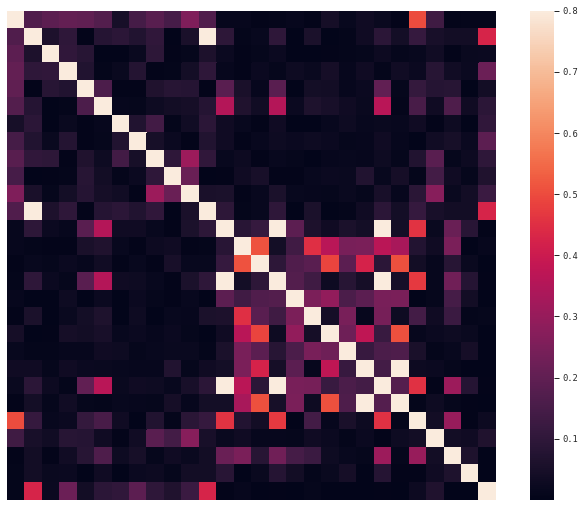

In [5]:
corrmat = df.corr(method='pearson', min_periods=1000)
# plot absolute values
corrmat = np.abs(corrmat)
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, xticklabels = False, yticklabels = False)

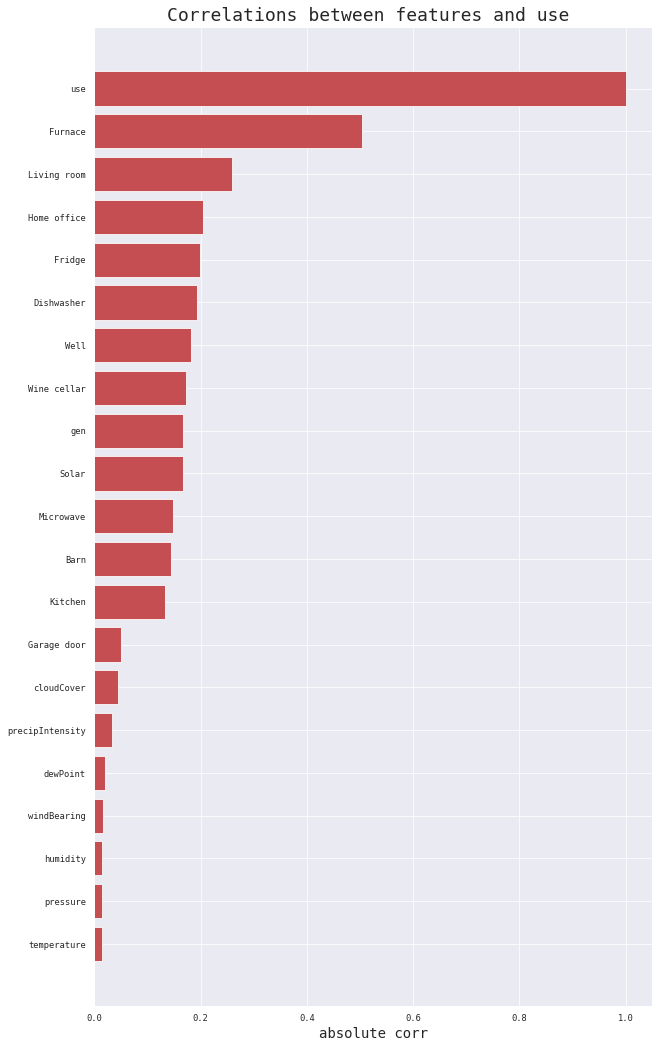

In [6]:
corr_target = corrmat['use'].reset_index()
corr_target.columns = ['feature','abs_corr']
corr_target = corr_target.sort_values(by = 'abs_corr', ascending = True).loc[corr_target['abs_corr'] >0.01]

ind = np.arange(corr_target.shape[0])
fig, ax = plt.subplots(figsize=(10,18))
rects = ax.barh(ind, corr_target.abs_corr.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_target.feature.values, rotation='horizontal')
ax.set_xlabel("absolute corr", fontsize = 14)
ax.set_title("Correlations between features and use ", fontsize = 18)
plt.show()

corr_target_f = list(corr_target.feature.values)

[22:02:07] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:07] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




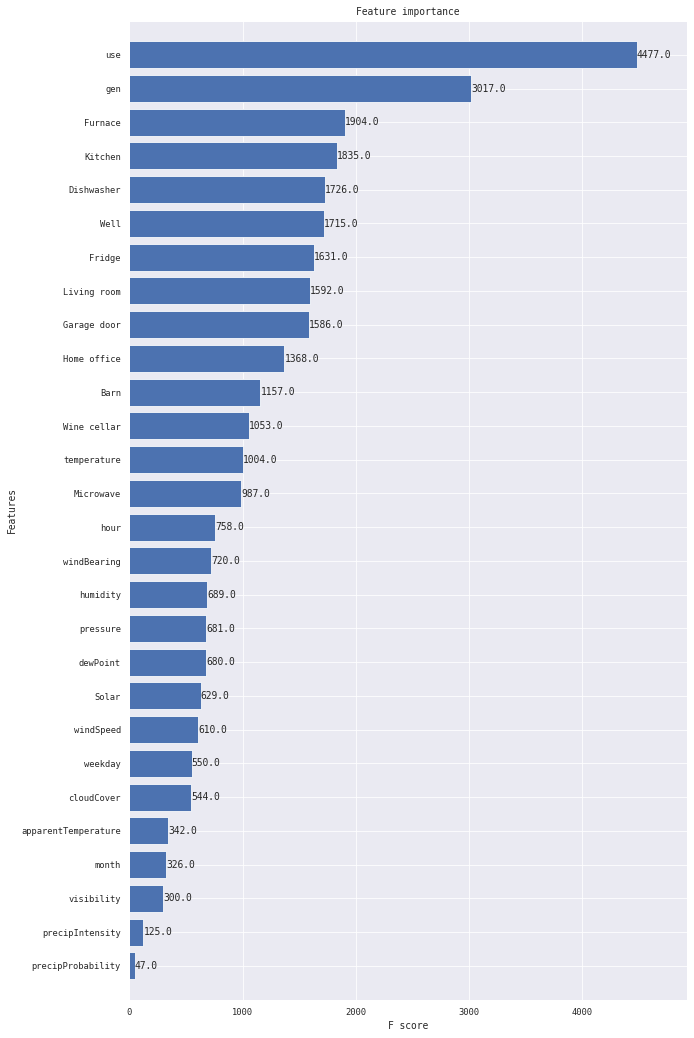

In [7]:
import xgboost as xgb

use = df["use"].values
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(df, use, feature_names=df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

importance = model.get_score(importance_type='weight')
tuples = sorted([(k, importance[k]) for k in importance], key=lambda x: x[1], reverse=True)
xgb_imp_f = [x[0] for x in tuples]

In [8]:
total_f = list(set(xgb_imp_f) | set(corr_target_f))
common_f = list(set(xgb_imp_f) & set(corr_target_f))
xgb_top_f = xgb_imp_f[:15]
corr_top_f = corr_target_f[:15]

# Help Functions

In [9]:
#Split dataframe into train, test and val

def createXY(df, featuresNames, target_name, validation=False, val_size=0.05, test_size=300):
    features = df[featuresNames]
    target = df[target_name]
    
    x_train, x_test, y_train, y_test = train_test_split(features.values,target.values.reshape(-1, 1), test_size=test_size, shuffle=False)
        
    if validation:
        x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, shuffle=False)

        return x_train, y_train, x_val, y_val , x_test, y_test
    
    
    return x_train, y_train, x_test, y_test
    
    

In [10]:
#Apply a scaler to the data

def scale(scaler, x_train, y_train, x_test, x_val=None, y_val=None):
    x_scaler = scaler()
    x_train = x_scaler.fit_transform(x_train)
    x_test = x_scaler.transform(x_test)
   
    y_scaler = scaler()
    y_train = y_scaler.fit_transform(y_train)
    
    if x_val is not None:
        x_val = x_scaler.transform(x_val)
        y_val = y_scaler.transform(y_val)
    
        return x_train, y_train, x_test, x_val, y_val,x_scaler, y_scaler

    return x_train, y_train, x_test, x_scaler, y_scaler
    


In [11]:
#Create generators, put data in time series forcast format

from keras.preprocessing.sequence import TimeseriesGenerator

def create_Generators(past_window,batch_size,x_train,y_train,x_test,y_test,x_val=None,y_val=None):

    train_generator = TimeseriesGenerator(x_train, y_train, length=past_window, batch_size=batch_size)
    test_generator = TimeseriesGenerator(x_test, y_test, length=past_window, batch_size=batch_size)
    
    if x_val is not None:
        val_generator = TimeseriesGenerator(x_val, y_val, length=past_window, batch_size=batch_size)
    
        return train_generator, val_generator, test_generator
    
    return train_generator, test_generator



In [26]:
def predict_evaluate(model, x_test, y_scaler, y_test_UnScalled, graphName = 'Energy Usage Prediction', showplots=False):
    prediction = model.predict(x_test).reshape(-1, 1)
    prediction = y_scaler.inverse_transform(prediction)

    diff = [abs(prediction[i]-y_test_UnScalled[i]) for i in range(len(prediction))]
    
    resultingPlot = plt.figure(figsize=(25,10))
    plt.plot(y_test_UnScalled, color='red', label='Original Usage')
    plt.plot(prediction, color='blue', label='Predicted Usage')
    plt.plot(diff, color='green', label='Error')
    plt.title(graphName)
    plt.ylabel('kW')
    plt.legend()
    
    mape = mean_absolute_percentage_error(y_test_UnScalled, prediction)
    mae = mean_absolute_error(y_test_UnScalled, prediction)
    maxae = max(diff)
    mse = mean_squared_error(y_test_UnScalled, prediction)
    
    if showplots:
        plt.show()
        print("Mean Absolute Percentage Error: ", mape)
        print("Mean Absolute Error: ", mae)
        print("Max Absolute Error: ", maxae)
        print("Mean Squared Error: ", mse)
    
    return {"name":graphName, "resultingPlot": resultingPlot, "mape":mape, "mae":mae, "maxae":maxae, "mse":mse}

In [13]:
TARGET_NAME = "use"
PAST_WINDOWS = [1, 10]
FEATURE_NAMES = {"only_use": ["use"], 
                 "xgb_top_f":xgb_top_f, 
                 "corr_top_f":corr_top_f, 
                 "all_features":list(df.columns)}

results = []

# LSTM

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU, Dropout
from keras.callbacks import EarlyStopping

def define_model(past_window, num_features):
    
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True, input_shape=(past_window, num_features)))
    model.add(LSTM(units=128))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_absolute_error')
    #model.summary()
    
    return model

def train(model, train_generator, val_generator, showplot=False):
    early_stopping = EarlyStopping(monitor="val_loss", 
                                   patience=5, 
                                   mode="min")
    
    history = model.fit(train_generator, 
                                  epochs=32,
                                  validation_data=val_generator, 
                                  shuffle = False, 
                                  callbacks=[early_stopping],
                                  verbose=0
                                   )
    
    loss_per_epoch = history.history['loss']
    
    if showplot:
        plt.plot(range(len(loss_per_epoch)), loss_per_epoch)


def make_lstm(df, featuresNames, targetName, past_window, name='Energy Usage Prediction', showplots=False):
    num_features = len(featuresNames)

    x_train, y_train, x_val, y_val , x_test, y_test = createXY(df, featuresNames, targetName, validation=True)
    y_test_UnScalled = y_test[past_window:]

    x_train, y_train, x_test, x_val, y_val, x_scaler, y_scaler = scale(MinMaxScaler, x_train, y_train, x_test, x_val, y_val)
    train_generator, val_generator, test_generator= create_Generators(past_window,64,x_train,y_train,x_test,y_test,x_val,y_val)    

    model = define_model(past_window, num_features)
    train(model, train_generator, val_generator)

    return predict_evaluate(model, test_generator, y_scaler, y_test_UnScalled, graphName=name, showplots=showplots)


In [36]:
TARGET_NAME = "use"
PAST_WINDOW = 1
featuresNames = ["use"]

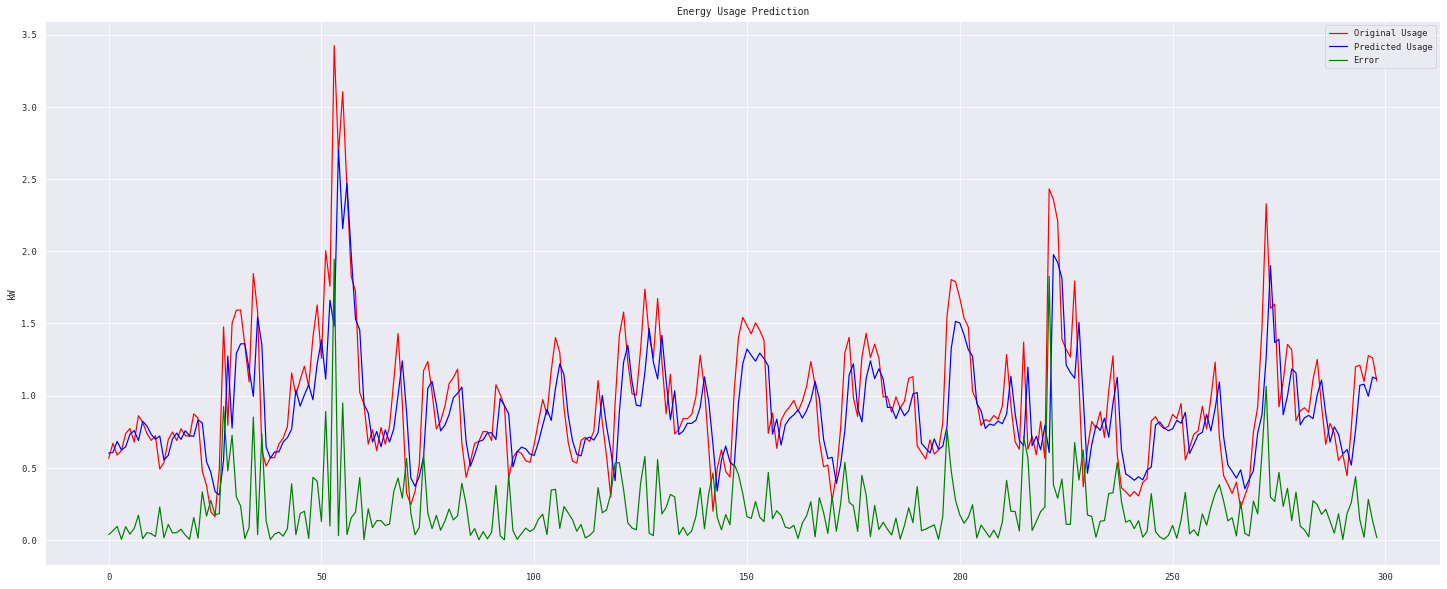

Mean Absolute Percentage Error:  0.24259968615021268
Mean Absolute Error:  0.20735423487283364
Max Absolute Error:  [1.94376453]
Mean Squared Error:  0.09681875399114961


In [38]:
_ = make_lstm(df, featuresNames, TARGET_NAME, PAST_WINDOW, showplots=True)

## Evaluate a bunch of LSTMs

In [ ]:
for past_window in PAST_WINDOWS:
    for featuresName, featurelist in FEATURE_NAMES.items():
        
        name = "LSTM: " + str(past_window) + " past_Window | " + featuresName + " featureList"
        Hello, {}'.format(name)
        result = make_lstm(df, featurelist, TARGET_NAME, past_window, name)     
        
        results.append(result)

# SVR

In [27]:
from sklearn.svm import SVR

def make_svr(df, featuresNames, targetName, past_window, svr_kernel, name='Energy Usage Prediction', showplots=False):
    num_features = len(featuresNames)
    
    #SEPARATE INTO TRAIN / TEST
    x_train, y_train, x_test, y_test = createXY(df, featuresNames, targetName, validation=False)
    y_test_UnScalled = y_test[past_window:]
    
    #SCALE
    x_train, y_train, x_test, x_scaler, y_scaler = scale(StandardScaler, x_train, y_train, x_test)
    
    #TIME SERIES FORMAT
    train_generator, test_generator= create_Generators(past_window,1,x_train,y_train,x_test,y_test)    
    svr_x_Train = [arr[0].flatten() for arr in train_generator]
    svr_y_Train = [arr[1].flatten() for arr in train_generator]
    svr_x_Test = [arr[0].flatten() for arr in test_generator]
    
    #TRAIN
    regressor = SVR(kernel = svr_kernel)  
    regressor.fit(svr_x_Train, svr_y_Train)
    
    #PREDICT
    return predict_evaluate(regressor, svr_x_Test, y_scaler, y_test_UnScalled, graphName=name, showplots=showplots)
    

In [28]:
TARGET_NAME = "use"

#1 PAST_WINDOW // ALL FEATURES
featuresNames = list(df.columns)
PAST_WINDOW = 1

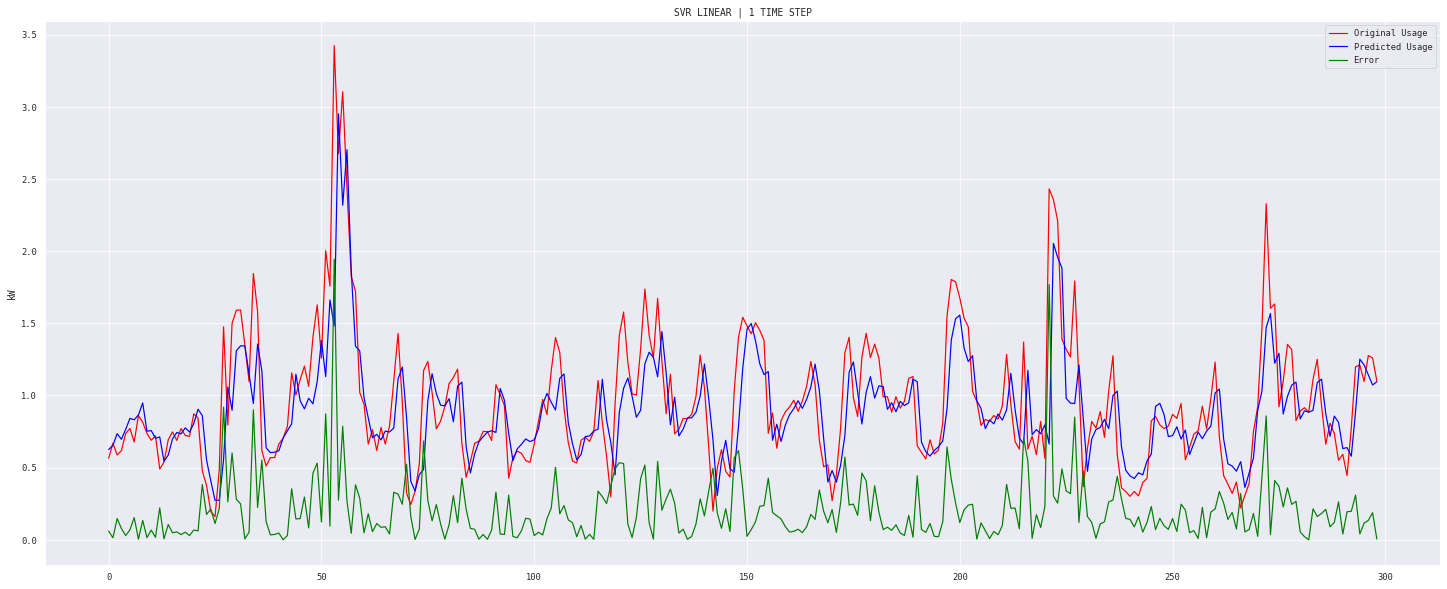

Mean Absolute Percentage Error:  0.2378485762227195
Mean Absolute Error:  0.20508601301283721
Max Absolute Error:  [1.94314206]
Mean Squared Error:  0.09238577517141239


In [33]:
_ = make_svr(df, featuresNames, TARGET_NAME, PAST_WINDOW, "linear", "SVR LINEAR | 1 TIME STEP", showplots=True)

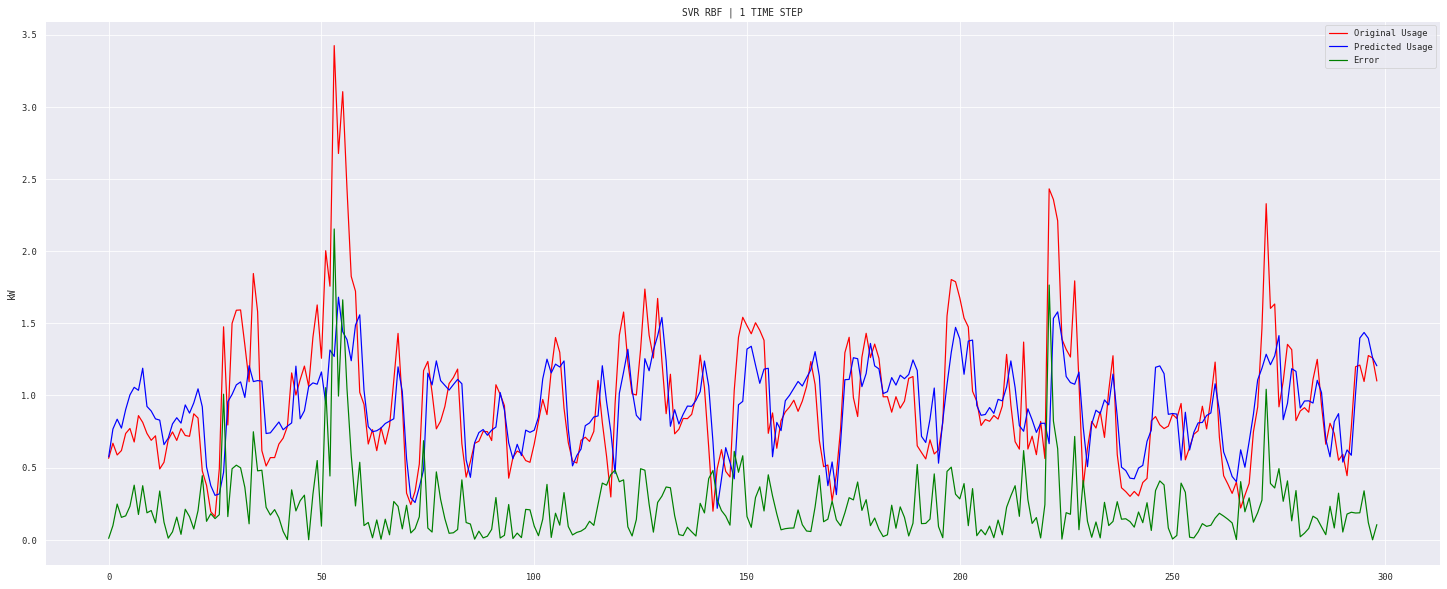

Mean Absolute Percentage Error:  0.26659422699578955
Mean Absolute Error:  0.23312325253984129
Max Absolute Error:  [2.15348418]
Mean Squared Error:  0.11843668051838316


In [32]:
_ = make_svr(df, featuresNames, TARGET_NAME, PAST_WINDOW, "rbf", "SVR RBF | 1 TIME STEP", showplots=True)

## Evaluate a bunch of SVRs

In [ ]:

KERNELS = ["linear", "rbf"]

for kernel in KERNELS:
    for past_window in PAST_WINDOWS:
        for featuresName, featurelist in FEATURE_NAMES.items():

            name = "SVR: " + kernel + " | " + str(past_window) + " past_Window | " + featuresName + " featureList"
            result = make_svr(df, featurelist, TARGET_NAME, past_window, kernel,name)     

            results.append(result)

# ARIMA

In [17]:
from statsmodels.tsa.arima.model import ARIMA

train = [x for x in df["use"][:-300].values]
test = [x for x in df["use"][-300:].values]

prediction = list()
for t in range(len(test)):
    model = ARIMA(train, order=(5,1,0))
    model = model.fit()
    pred = model.forecast()[0]

    prediction.append(pred)
    train.append(test[t])
    print('progress:%',round(100*(t/len(test))), end="\r")


Mean Absolute Percentage Error:  0.2607216191658445
Mean Absolute Error:  0.217471626004145
Max Absolute Error:  1.7704769419139414
Mean Squared Error:  0.10359649958626205


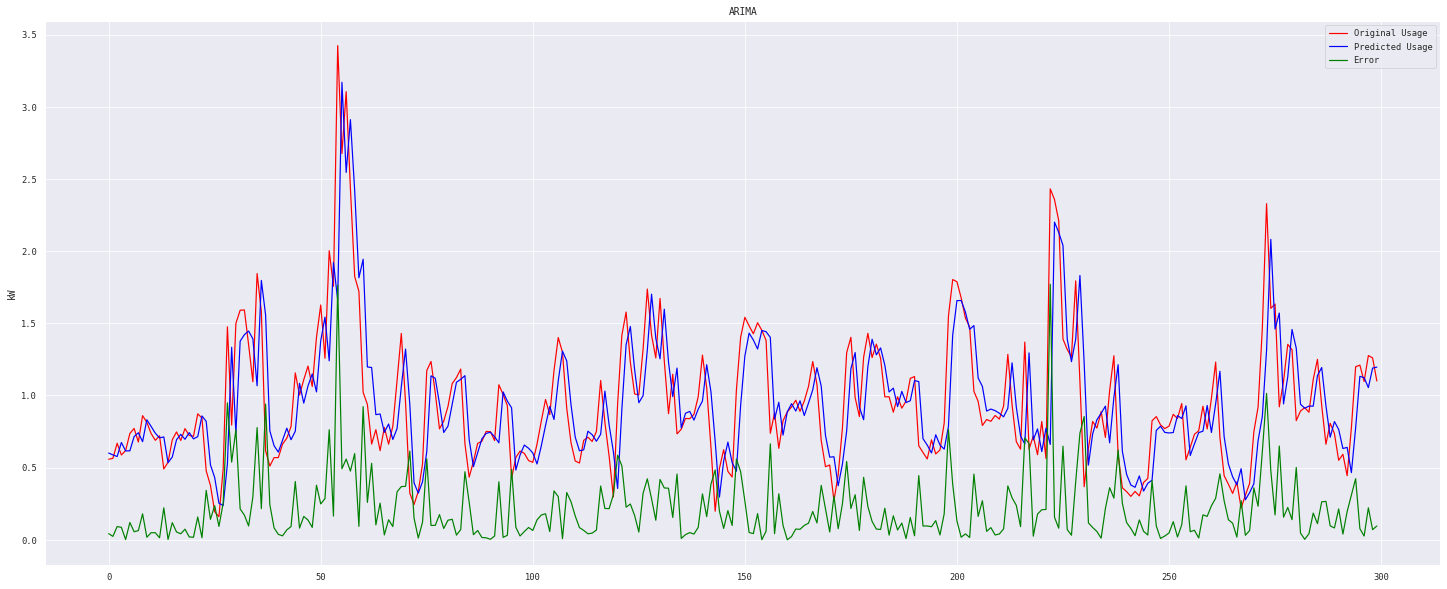

In [18]:
diff = [abs(prediction[i]-test[i]) for i in range(len(prediction))]

plt.figure(figsize=(25,10))
plt.plot(test, color='red', label='Original Usage')
plt.plot(prediction, color='blue', label='Predicted Usage')
plt.plot(diff, color='green', label='Error')
plt.title("ARIMA")
plt.ylabel('kW')
plt.legend()
plt.show

mape = mean_absolute_percentage_error(test, prediction)
mae = mean_absolute_error(test, prediction)
maxae = max(diff)
mse = mean_squared_error(test, prediction)
print("Mean Absolute Percentage Error: ", mape)
print("Mean Absolute Error: ", mae)
print("Max Absolute Error: ", maxae)
print("Mean Squared Error: ", mse)

# Results

In [ ]:
results.sort(key = lambda i: i['mape'],reverse=True)